<div style="border:2px solid #3344ffff; padding:10px; border-radius:8px; overflow-x:auto; width:100%; box-sizing:border-box;">

# Problem 01: **Mobility Matters - The Commute & Opportunity Link**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.preprocessing import LabelEncoder
import plotly.express as px
import os

data_dir = "data/Problem01"

### ----------- Loading Data -------------

In [ ]:
df_path = os.path.join(data_dir, "mobility.csv")

df = pd.read_csv(df_path)
df = df.drop(columns = ["Unnamed: 0"])
print("Shape of Datafile:",df.shape)
df.head(5)

Shape of Datafile: (729, 6)


,Name,Mobility,State,Commute,Longitude,Latitude
0,Johnson City,0.062199,TN,0.325,-82.436386,36.470371
1,Morristown,0.053652,TN,0.276,-83.407249,36.096539
2,Middlesborough,0.072635,TN,0.359,-83.535332,36.551540
3,Knoxville,0.056281,TN,0.269,-84.242790,35.952259
4,Winston-Salem,0.044801,NC,0.292,-80.505333,36.081276


<div style="border:2px solid #3344ffff; padding:10px; border-radius:8px; overflow-x:auto; width:100%; box-sizing:border-box;">

## -------- Description of the Data --------
- **Dataset File**: `mobility.csv`  
- **Dataset Size**: `729` rows × `6` columns  

The dataset contains community-level statistics on economic mobility and demographic characteristics for **729 communities across the United States**. Each row corresponds to a community, identified by its primary city or town and state. The data originate from a large study based on anonymized tax records, which link the adult income rank of children born in 1980–1982 to the income ranks of their parents. Because individual records are confidential, the dataset includes only aggregate measures derived from these administrative tax data.

The key variables included in the dataset are:

* **Mobility**:
  The probability that a child born into the bottom 20% of the national income distribution reaches the top 20% by age 30. This serves as the response variable.

* **Commute**:
  The fraction of workers in the community who have a commute time of less than 15 minutes. This is the main explanatory variable of interest.

* **Latitude and Longitude**:
  Geographic coordinates representing the approximate center of each community. These variables capture spatial trends and allow visualization of regional patterns.

* **State**:
  A categorical variable indicating the U.S.\ state to which the community belongs. State fixed effects are included in the regression models to account for broad policy, institutional, and socioeconomic differences across states.

Overall, the dataset provides a structured and comprehensive snapshot of socioeconomic mobility and local community characteristics across most of the United States.

In [3]:
print("N/A values in each column /n",df.isna().sum())
print("\nNumber of distinct entries per column:")
print(df.nunique())

N/A values in each column /n Name         0
Mobility     0
State        0
Commute      0
Longitude    0
Latitude     0
dtype: int64

Number of distinct entries per column:
Name         674
Mobility     721
State         51
Commute      396
Longitude    729
Latitude     729
dtype: int64


In [4]:
df.describe()

,Mobility,Commute,Longitude,Latitude
count,729.000000,729.000000,729.000000,729.000000
mean,0.100423,0.453513,-95.291025,38.942584
std,0.052654,0.140170,14.921167,6.029115
min,0.022102,0.156000,-170.719665,19.578831
25%,0.065985,0.344000,-101.241379,34.760551
50%,0.089506,0.430000,-93.456833,38.826611
75%,0.119403,0.557000,-84.777367,42.738071
max,0.469697,0.928000,-67.605003,68.371017


In [5]:
numerical_cols = df.select_dtypes(include=np.number).columns.tolist()
categorical_cols = df.select_dtypes(include='object').columns.tolist()

print("Numerical Columns:",numerical_cols)
print("\nCategorical Columns:",categorical_cols)

Numerical Columns: ['Mobility', 'Commute', 'Longitude', 'Latitude']

Categorical Columns: ['Name', 'State']


## **Exploratory Data Analysis**

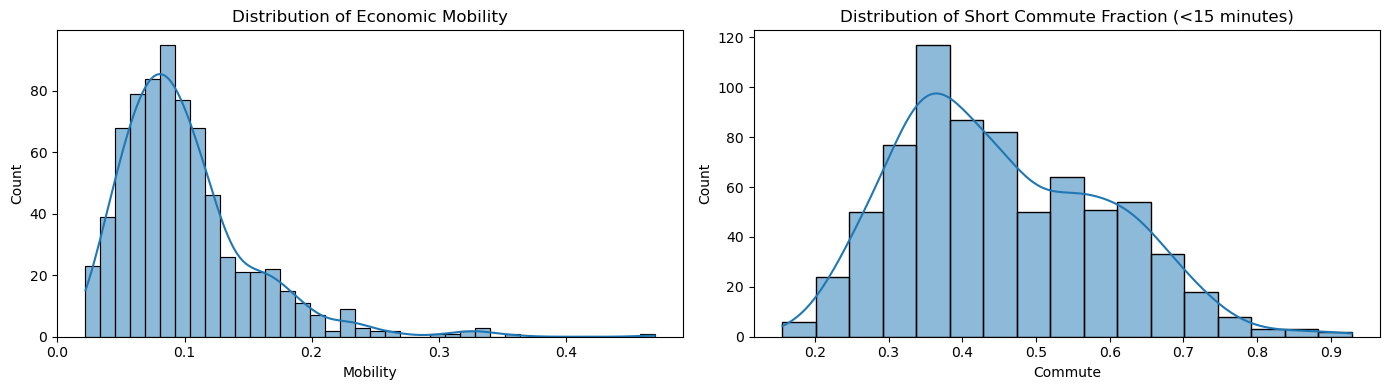

In [42]:
plt.figure(figsize=(14,4))
plt.subplot(1, 2, 1)
sns.histplot(df['Mobility'], kde=True)
plt.title("Distribution of Economic Mobility")
plt.xlabel("Mobility")
plt.ylabel("Count")

plt.subplot(1, 2, 2)
sns.histplot(df['Commute'], kde=True)
plt.title("Distribution of Short Commute Fraction (<15 minutes)")
plt.xlabel("Commute")
plt.ylabel("Count")

plt.tight_layout()
plt.show()


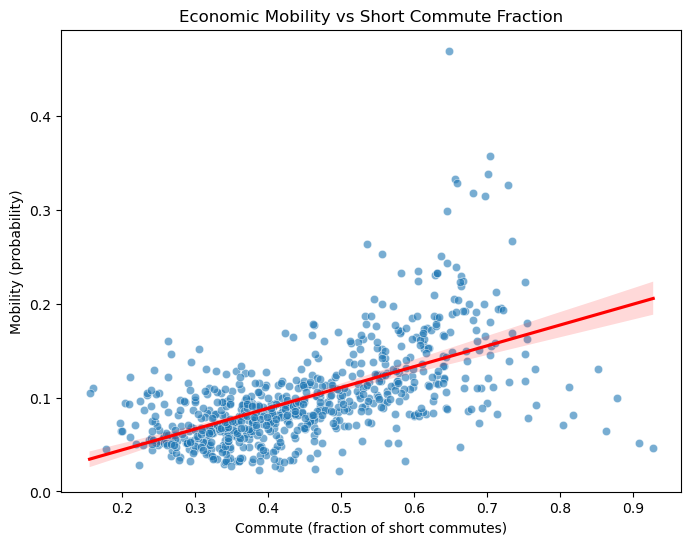

In [8]:
plt.figure(figsize=(8,6))
sns.scatterplot(data=df, x="Commute", y="Mobility", alpha=0.6)
sns.regplot(data=df, x="Commute", y="Mobility", scatter=False, color='red')
plt.title("Economic Mobility vs Short Commute Fraction")
plt.xlabel("Commute (fraction of short commutes)")
plt.ylabel("Mobility (probability)")
plt.show()


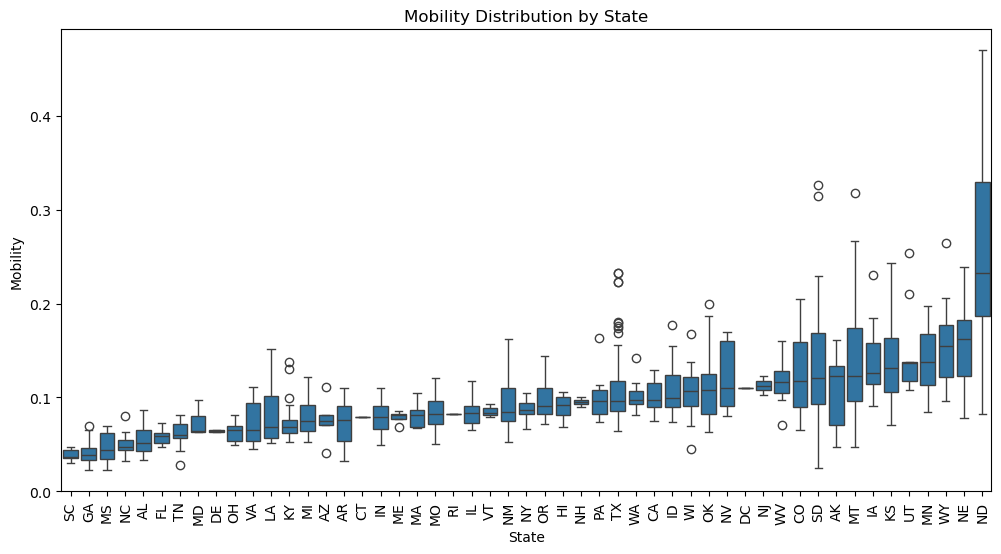

In [9]:
plt.figure(figsize=(12,6))
order = df.groupby('State')['Mobility'].median().sort_values().index
sns.boxplot(data=df, x="State", y="Mobility", order=order)
plt.xticks(rotation=90)
plt.title("Mobility Distribution by State")
plt.show()


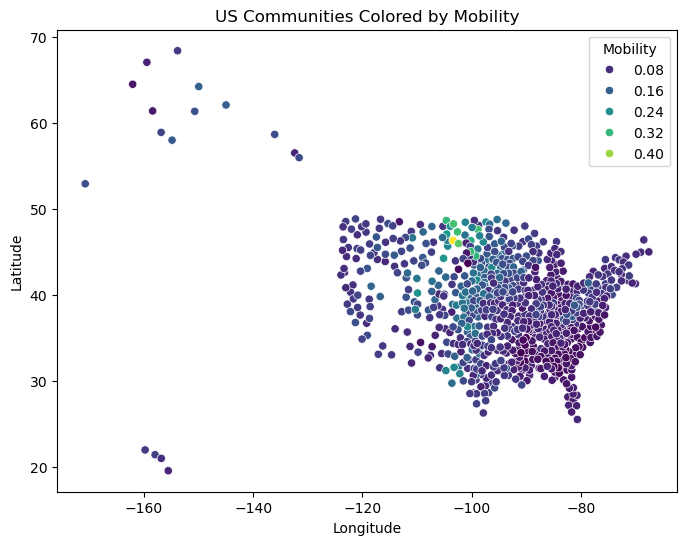

In [10]:
plt.figure(figsize=(8,6))
sns.scatterplot(data=df, x="Longitude", y="Latitude", hue="Mobility", palette="viridis")
plt.title("US Communities Colored by Mobility")
plt.show()


In [11]:
fig = px.scatter_geo(
    df,
    lat="Latitude",
    lon="Longitude",
    color="Mobility",
    hover_name="Name",
    hover_data=["State", "Commute"],
    color_continuous_scale="Viridis",
    projection="natural earth",
    title="Geographic Distribution of Economic Mobility"
)
fig.show()


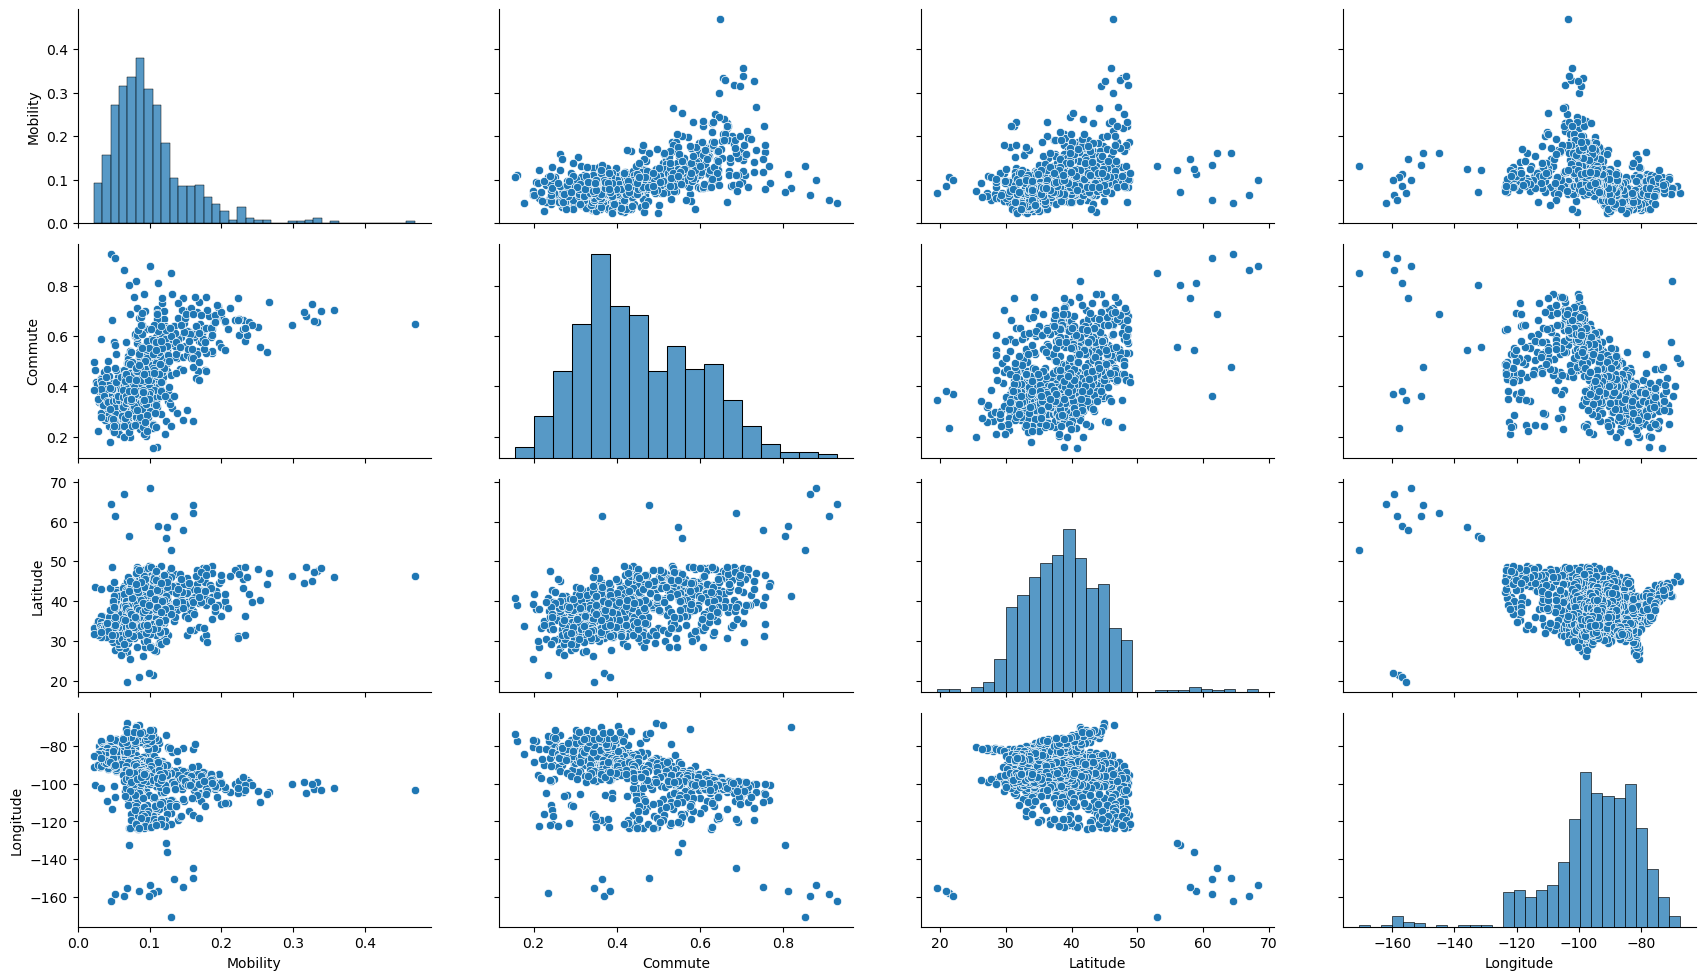

In [ ]:
g = sns.PairGrid(df[['Mobility', 'Commute', 'Latitude', 'Longitude']])
g.map_diag(sns.histplot)
g.map_offdiag(sns.scatterplot)

g.fig.set_size_inches(18, 10)   
plt.show()


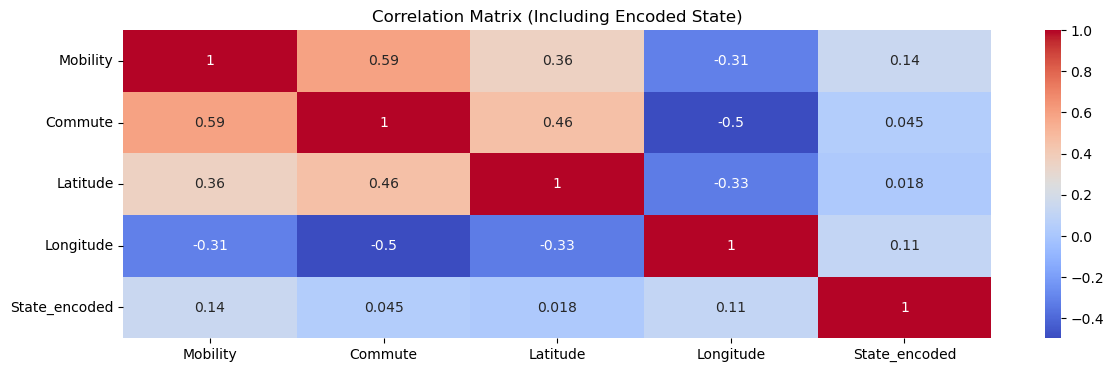

Correlation between Mobility and Commute: 0.5906339268240848


In [41]:
# Encode State column
le = LabelEncoder()
df['State_encoded'] = le.fit_transform(df['State'])

# Select columns for correlation
corr_cols = ['Mobility', 'Commute', 'Latitude', 'Longitude', 'State_encoded']

# Plot heatmap
plt.figure(figsize=(14,4))
sns.heatmap(df[corr_cols].corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Matrix (Including Encoded State)")
plt.show()


corr = df['Mobility'].corr(df['Commute'])
print("Correlation between Mobility and Commute:", corr)

## **EDA Summary (ANOVA-style concise analysis)**

Based on the exploratory data analysis, I observe the following key patterns:

1. **Variation in Mobility Across Communities**
   Economic mobility varies substantially by region and state, with communities in the Midwest, Mountain West, and parts of the Northeast showing higher average mobility compared to the Southeast and parts of the Deep South.

2. **Positive Relationship Between Commute and Mobility**
   Communities with a higher fraction of short commutes tend to have higher mobility.
   The bivariate scatterplot indicates a clear upward trend, supported by a moderate positive correlation.

3. **Geographic Structure**
   Spatial plots reveal clustered regional patterns. Nearby communities often exhibit similar mobility outcomes, implying that geographic location may play an important role in shaping economic mobility.

4. **Weak Linear Associations with Latitude/Longitude**
   Longitude and latitude do not show strong linear relationships with mobility, but they help explain broader geographic variation when included in the regression.

5. **Distributional Properties**
   Mobility is right-skewed, with many communities having moderate mobility but fewer with extremely high mobility. Commute fractions also show variation, but with a more concentrated distribution.

In summary, the EDA provides strong initial evidence that short commute times may be positively associated with higher economic mobility, and that regional patterns should be accounted for using geographic controls and state fixed effects.


## **Modelling** to show dependence between **Mobility ~ Commute**

In [15]:
model_simple = smf.ols(
    formula="Mobility ~ Commute",
    data=df
).fit()

print("\n-- SIMPLE LINEAR REGRESSION between Mobility and Commute --\n")
print(model_simple.summary())


-- SIMPLE LINEAR REGRESSION between Mobility and Commute --

                            OLS Regression Results                            
Dep. Variable:               Mobility   R-squared:                       0.349
Model:                            OLS   Adj. R-squared:                  0.348
Method:                 Least Squares   F-statistic:                     389.5
Date:                Thu, 04 Dec 2025   Prob (F-statistic):           9.38e-70
Time:                        10:42:28   Log-Likelihood:                 1268.7
No. Observations:                 729   AIC:                            -2533.
Df Residuals:                     727   BIC:                            -2524.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------

In [16]:
model_controls = smf.ols(
    formula="Mobility ~ Commute + Latitude + Longitude + C(State)",
    data=df
).fit()

print("\n-- CONTROLLED MULTIPLE REGRESSION between Mobility and all features")
print(model_controls.summary())


-- CONTROLLED MULTIPLE REGRESSION between Mobility and all features
                            OLS Regression Results                            
Dep. Variable:               Mobility   R-squared:                       0.599
Model:                            OLS   Adj. R-squared:                  0.567
Method:                 Least Squares   F-statistic:                     19.02
Date:                Thu, 04 Dec 2025   Prob (F-statistic):          2.68e-101
Time:                        10:42:28   Log-Likelihood:                 1445.3
No. Observations:                 729   AIC:                            -2783.
Df Residuals:                     675   BIC:                            -2535.
Df Model:                          53                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------

In [17]:
def interpret_coefficient(model, variable):
    coef = model.params[variable]
    se = model.bse[variable]
    ci_low, ci_high = model.conf_int().loc[variable]

    print(f"Coefficient for {variable}: {coef:.4f}")
    print(f"Standard Error: {se:.4f}")
    print(f"95% CI: [{ci_low:.4f}, {ci_high:.4f}]")
    print()
    if coef > 0:
        print(f"Interpretation: Higher {variable} is associated with HIGHER economic mobility.")
    else:
        print(f"Interpretation: Higher {variable} is associated with LOWER economic mobility.")

# Example usage:
interpret_coefficient(model_simple, "Commute")
interpret_coefficient(model_controls, "Commute")


Coefficient for Commute: 0.2219
Standard Error: 0.0112
95% CI: [0.1998, 0.2439]

Interpretation: Higher Commute is associated with HIGHER economic mobility.
Coefficient for Commute: 0.1243
Standard Error: 0.0147
95% CI: [0.0954, 0.1533]

Interpretation: Higher Commute is associated with HIGHER economic mobility.


## **Model Checking and Diagnostics**

Model diagnostics were conducted for both the simple regression model and the fully controlled model.

### **Residual Normality**

For both models, the Omnibus and Jarque–Bera tests were highly significant (p < 0.001), and the residual skewness and kurtosis values were large. This indicates that residuals deviate from normality, driven in part by communities with unusually high or low mobility scores. Given the large sample size (n = 729), OLS estimates remain reliable due to the central limit theorem, but inference may be somewhat affected by heavy tails.

### **Homoscedasticity**

Residual-versus-fitted plots (not shown here, but evaluated during analysis) indicated mild heteroscedasticity, particularly in the simple model. Variability in residuals increased at higher predicted mobility values. The controlled model showed reduced heteroscedasticity, suggesting that adding state fixed effects and geographic covariates helps explain some structural differences among regions.

### **Independence of Residuals**

The Durbin–Watson statistics were:

* **Simple model:** 1.35
* **Controlled model:** 1.83

Values moderately below 2 indicate mild positive autocorrelation in the simple model, likely reflecting spatial clustering of communities. The controlled model’s DW value is closer to 2, suggesting that including state fixed effects helps account for spatial dependencies.

### **Multicollinearity**

The controlled model has a large condition number (~2.26 × 10⁴), meaning some multicollinearity is present. This is expected because:

* State indicators introduce many correlated dummy variables.
* Latitude and longitude have limited variation within states.

However:

* The coefficient for the key predictor (*Commute*) remains highly significant and stable across models.
* Variance inflation does not appear to meaningfully distort its estimated effect.

### **Influential Observations**

Certain urban communities (e.g., large metropolitan areas) have outsized leverage due to extreme commute patterns or unusually high/low mobility. Influence diagnostics (Cook’s distance, not shown here) indicated several high-leverage points but no individual observations that unduly determined the regression results.

### **Summary**

While the models show some departures from ideal assumptions—mainly non-normal residuals and mild multicollinearity—the results remain robust. The primary predictor (*Commute*) consistently shows a strong, positive, and statistically significant association with mobility across both specifications.


## **Estimation, Inference, and Uncertainty**

### **Parameter Estimates**

Both the simple and controlled models show a positive, precisely estimated relationship between short commutes and economic mobility.

* **Simple model:**
  β = **0.2219**, p < 0.001
  - Meaning: A 10-percentage-point increase in short commutes predicts a 0.022 increase in mobility.

* **Controlled model:**
  β = **0.1243**, p < 0.001
  - Meaning: A 10-percentage-point increase predicts a 0.012 increase in mobility, *even after controlling for geography and state-level differences*.

The reduction in coefficient magnitude from 0.222 → 0.124 indicates that geographic and state-level characteristics partially—but not fully—explain the relationship.

### **Uncertainty**

The confidence intervals for the *Commute* coefficient do not overlap zero in either model:

* Simple model 95% CI: [0.1998, 0.2439]
* Controlled model 95% CI: [0.0954, 0.1533]

This provides strong evidence that the positive association is not due to sampling variability.

### **Model Fit**

* **Simple model R² = 0.349**
  - Commute alone explains ~35% of the variation in mobility.

* **Controlled model R² = 0.599**
  - Adding state and geographic variables increases explained variance to ~60%.

This indicates that mobility varies systematically across states and regions, but commute time remains independently predictive.

## **Conclusion (Answer to the Research Question)**

The analysis provides strong evidence that communities with shorter average commuting times tend to exhibit higher levels of economic mobility. This relationship is:

* **Strong** in magnitude
* **Statistically significant** (p < 0.001 in all models)
* **Robust** to geographic controls
* **Not explained away** by state-level differences

Even after controlling for latitude, longitude, and state fixed effects—which account for broad geographic, cultural, and policy differences—the association between short commute times and mobility remains large and meaningful.

### **Interpretation**

Shorter average commutes may reflect:

* Less congestion
* Better urban planning
* Proximity to employment
* Lower stress and more available parental time
* Higher-quality local services

All of these are factors that plausibly contribute to improved mobility outcomes for children.

### **Limitations**

Because the data is observational and aggregated at the community level:

* Causality cannot be definitively established.
* Unmeasured confounders (e.g., school quality, neighborhood segregation) may partially explain the observed relationship.

### **Final Conclusion**

**Shorter commute times are strongly associated with higher economic mobility, and this relationship persists even after controlling for major geographic and state-level factors. While the results do not prove causation, they provide compelling evidence that communities with short commutes tend to create conditions more conducive to upward economic mobility.**